### ***Описание проекта: Статистический анализ данных***
        Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких             городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу 
    вырасти.
    Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. 
    Сервисом можно пользоваться:
    без подписки:
        абонентская плата отсутствует;
        стоимость одной минуты поездки — 8 рублей;
        стоимость старта (начала поездки) — 50 рублей;
    с подпиской Ultra:
        абонентская плата — 199 рублей в месяц;
        стоимость одной минуты поездки — 6 рублей;
        стоимость старта — бесплатно. 

**Описание данных**

*В основных данных есть информация о пользователях, их поездках и подписках.*

    Пользователи — users_go.csv

        user_id - уникальный идентификатор пользователя
        name - имя пользователя
        age - возраст
        city - город
        subscription_type - тип подписки (free, ultra)

    Поездки — rides_go.csv

        user_id - уникальный идентификатор пользователя
        date - дата и время поездки
        distance - расстояние поездки
        duration - длительность поездки


    Подписки — subscriptions_go.csv

        subscription_type - тип подписки
        minute_price - стоимость одной минуты поездки по данной подписке
        start_ride_price - стоимость начала поездки
        subscription_fee - стоимость ежемесячного платежа


#### Шаг 1. Загрузка данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [ ]:
# информация о пользователях
try:
    users = pd.read_csv('YOUR_DATA')
except:
    users = pd.read_csv('YOUR_DATA')
# информация о поездках
try:
    rides = pd.read_csv('YOUR_DATA')
except:
    rides = pd.read_csv('YOUR_DATA')    
# информация о подписках
try:
    subscriptions = pd.read_csv('YOUR_DATA')
except:
    subscriptions = pd.read_csv('YOUR_DATA')

Описание выгруженных данных есть в брифе

In [3]:
display(users.head())
users.info()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [4]:
rides['duration'] = rides['duration'].round(2)
display(rides.head())
rides.info()

,user_id,distance,duration,date
0,1,4409.919140,25.60,2021-01-01
1,1,2617.592153,15.82,2021-01-18
2,1,754.159807,6.23,2021-04-20
3,1,2694.783254,18.51,2021-08-11
4,1,4028.687306,26.27,2021-08-28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [5]:
display(subscriptions.head())
subscriptions.info()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


#### Шаг 2. Предобработка данных

In [6]:
rides['date'] = pd.to_datetime(rides['date'])
rides['month_number'] = rides['date'].dt.month

In [7]:
users = users.drop_duplicates()
print(users.isna().sum())
print(users.duplicated().sum())

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64
0


In [8]:
print(rides.isna().sum())
print(rides.duplicated().sum())

user_id         0
distance        0
duration        0
date            0
month_number    0
dtype: int64
0


In [9]:
print(subscriptions.isna().sum())
print(subscriptions.duplicated().sum())

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64
0


    Предобработка получилась небольшая, данные в порядке, был приведен столбец 
    date к типу данных дата, добавлен столбец с номером месяца и удалены дубликаты в датафрейме users

#### Шаг 3. Исследовательский анализ данных

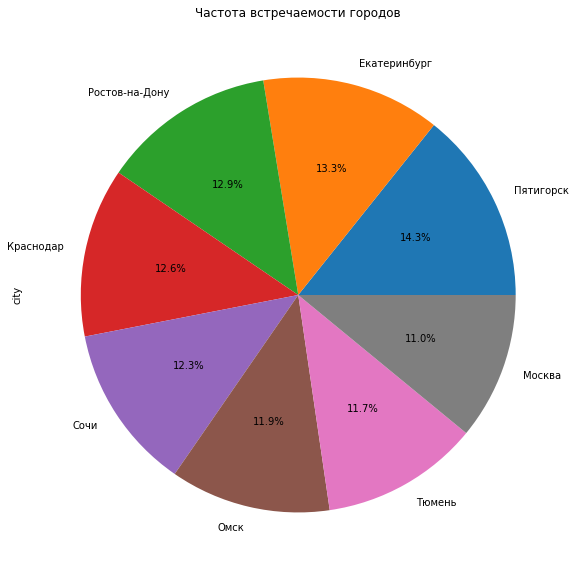

In [10]:
#display(users)
(
    users['city'].value_counts().plot(
    kind = 'pie', 
    figsize=(10,10),
    autopct="%1.1f%%",
    title = 'Частота встречаемости городов')
);

    Города распределены равномерно, больше всего пользователей из Пятигорска, 
    меньше всего из Москвы, что как будто странно, Москва все-таки

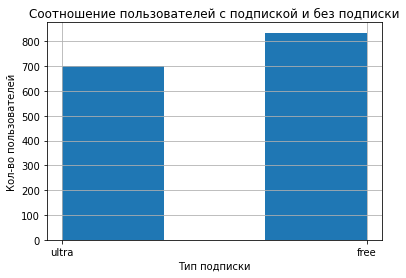

In [11]:
users['subscription_type'].hist(range=(0, 1), bins=3)
plt.xlabel('Тип подписки')
plt.ylabel('Кол-во пользователей')
plt.title('Соотношение пользователей с подпиской и без подписки');

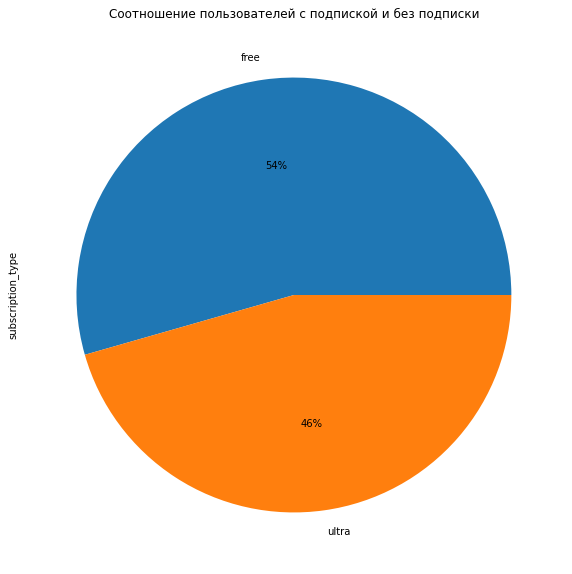

In [12]:
(
    users['subscription_type'].value_counts().plot(
    kind = 'pie', 
    figsize=(10,10),
    autopct="%1.0f%%",
    title = 'Соотношение пользователей с подпиской и без подписки')
);

Пользователей без подписки больше - 54% против 46% 

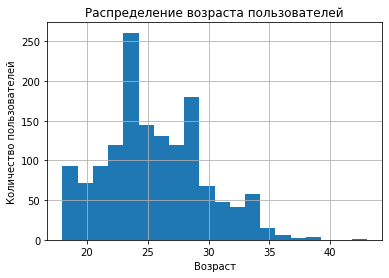

In [30]:
users['age'].hist(range=(18, 43), bins=20)
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.title('Распределение возраста пользователей');
#users.describe()

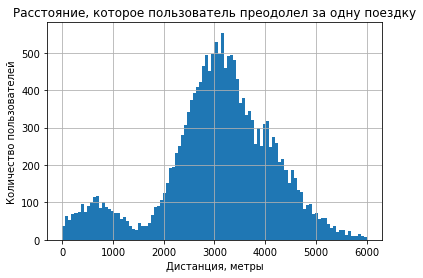

In [14]:
# display(rides.head())
rides['distance'].hist(range=(0, 6000), bins=100)
plt.xlabel('Дистанция, метры')
plt.ylabel('Количество пользователей')
plt.title('Расстояние, которое пользователь преодолел за одну поездку');

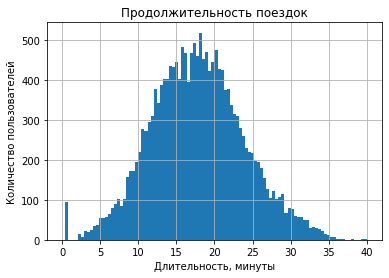

In [15]:
# display(rides.head())
rides['duration'].hist(range=(0, 40), bins=100)
plt.xlabel('Длительность, минуты')
plt.ylabel('Количество пользователей')
plt.title('Продолжительность поездок');

    Из графиков можно сказать, что средний возраст пользователей составляет 25 лет и как раз таких людей больше всего,
    Среднее расстояние, которое преодолевают пользователи 2500-3500 метров с пиком примерно на 3200,
    Средняя продолжительность поездок составляет от 13-21 минут, также можно увижеть шпиль около нуля минут,
    возможно люди используют самокаты для коротких поездкок, на графике, где показано расстояние можно увидеть,
    что также люди используют самокаты для проезда на расстояние до одного километра

#### Шаг 4. Объединение данных

In [16]:
data = users.merge(rides)
data = data.merge(subscriptions)
display(data.head())

,user_id,name,age,city,subscription_type,distance,duration,date,month_number,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.60,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.82,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.23,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.51,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.27,2021-08-28,8,6,0,199


    Создан новый датафрейм - data из датафреймов users, rides, subscriptions

In [17]:
print(len(data))
print(len(users))
print(len(rides))
print(len(subscriptions))

18068
1534
18068
2


In [18]:
data_subscribers = data.query('subscription_type == "ultra"')
display(data_subscribers)

,user_id,name,age,city,subscription_type,distance,duration,date,month_number,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.60,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.82,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.23,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.51,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.27,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,24.67,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,15.89,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,14.39,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,15.84,2021-10-17,10,6,0,199


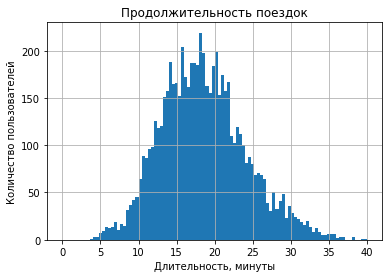

In [19]:
data_subscribers['duration'].hist(range=(0, 40), bins=100)
plt.xlabel('Длительность, минуты')
plt.ylabel('Количество пользователей')
plt.title('Продолжительность поездок');

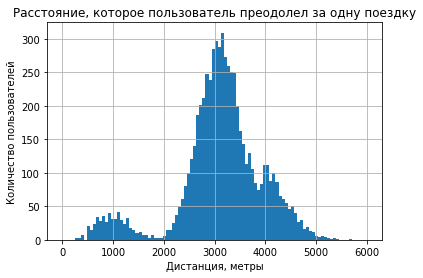

In [20]:
data_subscribers['distance'].hist(range=(0, 6000), bins=100)
plt.xlabel('Дистанция, метры')
plt.ylabel('Количество пользователей')
plt.title('Расстояние, которое пользователь преодолел за одну поездку');

    data_subscribers - датафрейм с информацией о пользователях с подпиской, из
    визуализации можно увидеть самую частую продолжительноть поездок от 13 до 20 минут,
    также самую частую дистанцию 3000-3100 метров

In [21]:
data_free = data.query('subscription_type == "free"')
display(data_free)

,user_id,name,age,city,subscription_type,distance,duration,date,month_number,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.94,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.23,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.02,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.78,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.43,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.82,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.41,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.44,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.67,2021-11-27,11,8,50,0


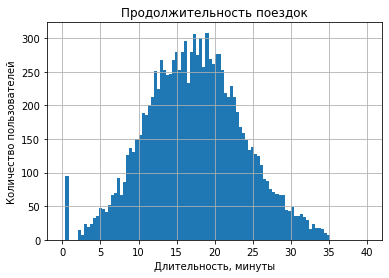

In [22]:
data_free['duration'].hist(range=(0, 40), bins=100)
plt.xlabel('Длительность, минуты')
plt.ylabel('Количество пользователей')
plt.title('Продолжительность поездок');

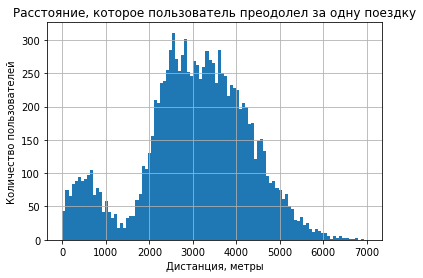

In [23]:
data_free['distance'].hist(range=(0, 7000), bins=100)
plt.xlabel('Дистанция, метры')
plt.ylabel('Количество пользователей')
plt.title('Расстояние, которое пользователь преодолел за одну поездку');

    data_free - датафрейм с информацией о пользователях без подписки, из
    визуализации можно увидеть самую частую продолжительноть поездок от 13 до 20 минут,
    также самую частую дистанцию 2200-2800 метров

Единственное, что можно сказать, пользователи без подписки ездят на более короткие расстояния и намного больше используют самокат для очень коротких поздок

#### Шаг 5. Подсчёт выручки

In [24]:
data['duration'] = np.ceil(data['duration'])
aggregated_data = pd.pivot_table(data,
                                 index=['month_number', 'user_id'],
                                 values=['name', 'subscription_type', 'distance', 'duration'],
                                 aggfunc={'name': 'count',
                                          'subscription_type': 'first',
                                          'distance': 'sum',
                                          'duration': 'sum'})


def income(row):
    if row['subscription_type'] == 'ultra':
        return row['name'] + 6 * row['duration'] + 199
    else:
        return row['name'] * 50 + 8 * row['duration']


aggregated_data['income'] = aggregated_data.apply(income, axis=1).round()
display(aggregated_data.head(10))

distance  duration  name subscription_type  income
month_number user_id                                                       
1            1        7027.511294      42.0     2             ultra   453.0
             3        3061.777147      13.0     1             ultra   278.0
             5        3914.646990      13.0     1             ultra   278.0
             7        6478.080979      28.0     2             ultra   369.0
             12       3577.151148      33.0     1             ultra   398.0
             13       6687.987446      42.0     2             ultra   453.0
             14       7699.643820      35.0     2             ultra   411.0
             15       4187.621459      39.0     1             ultra   434.0
             20       3516.719208      29.0     1             ultra   374.0
             22       3058.692225      13.0     1             ultra   278.0

    aggregated_data - датафрейм с агрегированными данными о поездках на основе датафрейма data, добавлен 
    столбец income - помесячная выручка от каждого пользователя

#### Шаг 6. Проверка гипотез

    Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.
    Гипотеза - тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Я выбрал метод ttest_ind, потому что у нас есть две независимые выборки, в которых нужно найти равенство средних двух генеральных совокупностей
    Для проверки этой и других следующих гипотез alpha будет равна 5 процентам, потому что это стандартное значение, чтобы           понять нужно ли отвергать нулевую гипотезу

H0 - Время на поездки у пользователей с подпиской = время на поездки у пользователей без подписки

H1 - Время на поездки у пользователей с подпиской > время на поездки у пользователей без подписки

In [25]:
subscribers = data_subscribers['duration']
free_users = data_free['duration']

alpha = 0.05
results = st.ttest_ind(subscribers, free_users, alternative='greater')
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу о равенстве времени поездок пользователей')
else:
    print('Не получилось отвергнуть нулевую гипотезу о равенстве времени поездок пользователей')

p-значение: 1.274138957151199e-34
Отвергаем нулевую гипотезу о равенстве времени поездок пользователей


    Гипотеза - тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании.

    Нулевая гипотеза была опровергнута

Гипотеза - Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Я выбрал метод ttest_1samp, потому что у нас есть одна выборка(уже в целом можно поэтому выбрать), в которых нужно найти равенство средней генеральной совокупности фиксированному числу, в нашем случае - 3130

H0 - Расстояние поездки пользователей с подпиской = 3130 метров

H1 - Расстояние поездки пользователей с подпиской > 3130 метров

In [26]:
subscribers_distance = data_subscribers['distance']
interested_value = 3130
alpha = 0.05

results = st.ttest_1samp(subscribers_distance, interested_value, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу о равенстве расстояния поездок пользователей')
else:
    print('Не получилось отвергнуть нулевую гипотезу о равенстве расстояния поездок пользователей')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу о равенстве расстояния поездок пользователей


    Гипотеза - Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что           среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 

    Не получилось опровергнуть нулевую гипотезу

Гипотеза - будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Я выбрал метод ttest_ind, потому что у нас есть две независимые выборки, в которых нужно найти равенство средних двух генеральных совокупностей

H0 - Месячная выручка пользователей с подпиской = выручке пользователей без подписки

H1 - Месячная выручка пользователей с подпиской > выручке пользователей без подписки

In [27]:
subscribers_income = aggregated_data[aggregated_data['subscription_type'] == 'ultra']['income']
free_users_income = aggregated_data[aggregated_data['subscription_type'] == 'free']['income']

alpha = 0.05
results = st.ttest_ind(subscribers_income, free_users_income, alternative='greater')
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу о равенстве дохода от пользователей')
else:
    print('Не получилось отвергнуть нулевую гипотезу о равенстве дохода от пользователей')

p-значение: 6.422503434518864e-34
Отвергаем нулевую гипотезу о равенстве дохода от пользователей


    Гипотеза - будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без           подписки.  

    Гипотеза была опровергнута, значит доход от пользователей с подпиской больше

6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

    Я бы использовал двухвыборочный t-тест для зависимых выборок(st.ttest_rel)
    Формулировка гипотез:
    H0 - μ1 = μ2
    H1 - μ1 != μ2,
    где μ1 и μ2 — средние значения до и после изменения.
    Вызов бы выглядел так st.ttest_rel(before, after)

### Общий вывод

Во время исследования о некоторых пользователях из нескольких городов, а также об их поездках, данные были обработаны: заполнены пропуски и удалены дубликаты, были добавлены новые столбцы. По итогам можно сделать следующие выводы:

*Исследовательский анализ:*

    -Частота встречаемости городов - города распределены равномерно, больше всего пользователей из Пятигорска(14.3%), 
    меньше всего из Москвы(11%).
    -Пользователей без подписки больше - 54% против 46%
    -Возраст пользователей - самый частый возраст 25 лет
    -Расстояние, которое пользователь преодолел за одну поездку - чаще всего пользователи проезжают около 3 км.
    -Продолжительность поездок - чаще всего пользователи используют самокаты в течение 15-20 минут

*Проверка гипотез:*

    Гипотеза - тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании.
    Гипотеза была опровергнута
    
    Гипотеза - Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 
    Не получилось опровергнуть нулевую гипотезу
    
    Гипотеза - будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.  
    Гипотеза была опровергнута, значит доход от пользователей с подпиской больше
